In [4]:
pip list


Package                   Version
------------------------- --------------
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
astroid                   3.2.4
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
autopep8                  2.3.1
babel                     2.16.0
bandit                    1.7.9
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
comm                      0.2.2
cryptography              43.0.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
dill                      0.3.8
distlib                   0.3.8
docutils                  0.21.2
executing                 2.1.0
fastjsonschema            2.20.0
filelock                  3.16.0
flake8                    7.1.1
fqdn           

In [1]:
pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.1.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached numpy-2.1.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime
markers=pd.read_csv("/workspace/Pyspark_projects/Challenge/datesets/electric_vehicle_sales_by_makers.csv")
date=pd.read_csv("/workspace/Pyspark_projects/Challenge/datesets/dim_date.csv")
markers_date= markers.merge(date,how="inner",on="date")
markers_date

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0,2022,Q2
...,...,...,...,...,...,...
811,01-Mar-24,2-Wheelers,BGAUSS,3070,2024,Q4
812,01-Mar-24,2-Wheelers,BATTRE ELECTRIC,625,2024,Q4
813,01-Mar-24,2-Wheelers,KINETIC GREEN,3915,2024,Q4
814,01-Mar-24,2-Wheelers,REVOLT,585,2024,Q4


In [3]:
state=pd.read_csv("/workspace/Pyspark_projects/Challenge/datesets/electric_vehicle_sales_by_state.csv")


In [4]:
state["state"].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh',
       'Andaman & Nicobar', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [5]:
states=state.replace("Andaman & Nicobar","Andaman & Nicobar Island")

In [6]:
state_date=states.merge(date,how="inner",on="date")
state_date

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,2022,Q1
...,...,...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,2024,Q4
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,2024,Q4
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,2024,Q4
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4


# 1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in 
terms of the number of 2-wheelers sold.

Identify the top 5 states with the highest penetration rate in 2-wheeler
and 4-wheeler EV sales in FY 2024.

In [7]:
two_wheeler = (state_date[state_date["vehicle_category"]=="2-Wheelers"]) 
two_whe_24=two_wheeler[two_wheeler["fiscal_year"]==2024]
total = two_whe_24.groupby("state")[["electric_vehicles_sold", "total_vehicles_sold"]].sum()
total["penetration"] = total["electric_vehicles_sold"]/total["total_vehicles_sold"]*100
total.sort_values("penetration",ascending=False).head(5)


,electric_vehicles_sold,total_vehicles_sold,penetration
state,,,
Goa,9768,54290,17.992264
Kerala,64769,478887,13.524903
Karnataka,148111,1279767,11.573279
Maharashtra,183052,1817343,10.072507
Delhi,38094,405218,9.400866


In [8]:
two_wheeler = (state_date[state_date["vehicle_category"]=="4-Wheelers"]) 
two_whe_24=two_wheeler[two_wheeler["fiscal_year"]==2024]
total = two_whe_24.groupby("state")[["electric_vehicles_sold", "total_vehicles_sold"]].sum()
total["penetration"] = total["electric_vehicles_sold"]/total["total_vehicles_sold"]*100
total.sort_values("penetration",ascending=False).head(5)


,electric_vehicles_sold,total_vehicles_sold,penetration
state,,,
Kerala,9169,159227,5.758445
Chandigarh,1020,22651,4.503112
Delhi,8630,201130,4.290757
Karnataka,12878,302221,4.261120
Goa,1031,24234,4.254353


How do the EV sales and penetration rates in Delhi compare to
Karnataka for 2024?

In [9]:
#two_wheeler = (state_date[state_date["vehicle_category"]=="4-Wheelers"]) 
two_whe_24=state_date[state_date["fiscal_year"]==2024]
two_whe_sr= two_whe_24[(two_whe_24["state"]=="Delhi")|(two_whe_24["state"]=="Karnataka")]
total = two_whe_sr.groupby("state")[["electric_vehicles_sold", "total_vehicles_sold"]].sum()
total["penetration"] = total["electric_vehicles_sold"]/total["total_vehicles_sold"]*100

total

,electric_vehicles_sold,total_vehicles_sold,penetration
state,,,
Delhi,46724,606348,7.705806
Karnataka,160989,1581988,10.176373


List the states with negative penetration (decline) in EV sales from 2022
to 2024?

In [10]:
options=[2022,2023,2024]
two_whe_24=state_date[state_date["fiscal_year"].isin(options)]
#two_whe_sr= two_whe_24[(two_whe_24["state"]=="Delhi")|(two_whe_24["state"]=="Karnataka")]
total = two_whe_24.groupby(["state","fiscal_year"])[["electric_vehicles_sold", "total_vehicles_sold"]].sum()
total["penetration"] = total["electric_vehicles_sold"]/total["total_vehicles_sold"]*100

total.sort_values("penetration",ascending=True).head(15)

electric_vehicles_sold  total_vehicles_sold  \
state             fiscal_year                                                
Arunachal Pradesh 2022                              0                19929   
Sikkim            2024                              0                10518   
                  2022                              0                 8897   
Mizoram           2022                              0                19439   
Sikkim            2023                              0                 9931   
Nagaland          2022                              1                12852   
Arunachal Pradesh 2023                              2                23726   
Meghalaya         2022                              4                22193   
Nagaland          2023                              3                14268   
                  2024                              9                16972   
Manipur           2022                             25                36129   
Tripura           2022                             28                37735   
Arunachal Pradesh 2024                             31                27892   
Meghalaya         2023                             40                31362   
Assam             2022                            730               379450   

                               penetration  
state             fiscal_year               
Arunachal Pradesh 2022            0.000000  
Sikkim            2024            0.000000  
                  2022            0.000000  
Mizoram           2022            0.000000  
Sikkim            2023            0.000000  
Nagaland          2022            0.007781  
Arunachal Pradesh 2023            0.008430  
Meghalaya         2022            0.018024  
Nagaland          2023            0.021026  
                  2024            0.053029  
Manipur           2022            0.069196  
Tripura           2022            0.074202  
Arunachal Pradesh 2024            0.111143  
Meghalaya         2023            0.127543  
Assam             2022            0.192384

List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in
terms of the number of 2-wheelers sold

In [11]:
options=[2023,2024]
two_whell =markers_date[markers_date["vehicle_category"]=="2-Wheelers"]
two_whe=two_whell[two_whell["fiscal_year"].isin(options)]
ts=two_whe.groupby(["maker","fiscal_year"])["electric_vehicles_sold"].sum()
#ts["total"]
top=ts.sort_values(ascending=False).head(3)
bottom=ts.sort_values(ascending=False).tail(3)
top
bottom

maker            fiscal_year
JITENDRA         2023           8563
REVOLT           2024           7254
BATTRE ELECTRIC  2024           4841
Name: electric_vehicles_sold, dtype: int64

In [16]:
ts

maker            fiscal_year
AMPERE           2023            87376
                 2024            54388
ATHER            2023            76921
                 2024           107552
BAJAJ            2023            32797
                 2024           105695
BATTRE ELECTRIC  2024             4841
BEING            2023            11018
BGAUSS           2024            15051
HERO ELECTRIC    2023            88993
                 2024            11949
JITENDRA         2023             8563
KINETIC GREEN    2024             9585
OKAYA EV         2023            13172
                 2024            13864
OKINAWA          2023            96945
                 2024            20621
OLA ELECTRIC     2023           152583
                 2024           322489
OTHERS           2023            52953
                 2024            78660
PURE EV          2023            11556
REVOLT           2023            12933
                 2024             7254
TVS              2023            82

In [17]:
top

maker         fiscal_year
OLA ELECTRIC  2024           322489
TVS           2024           180743
OLA ELECTRIC  2023           152583
Name: electric_vehicles_sold, dtype: int64

In [18]:
bottom

maker            fiscal_year
JITENDRA         2023           8563
REVOLT           2024           7254
BATTRE ELECTRIC  2024           4841
Name: electric_vehicles_sold, dtype: int64

# 4. What are the quarterly trends based on sales volume for the top 5 EV
makers (4-wheelers) from 2022 to 2024?

In [12]:
quar=[2022,2023,2024]
four_whell =markers_date[markers_date["vehicle_category"]=="4-Wheelers"]

#fr=four_whe.groupby(["maker","fiscal_year"])["electric_vehicles_sold"].sum()
s=four_whell.groupby(["maker","fiscal_year","quarter"])["electric_vehicles_sold"].sum().rename("sum")
s.sort_values(ascending=False).head(10)


maker                fiscal_year  quarter
Tata Motors          2024         Q4         17361
                                  Q3         13236
Mahindra & Mahindra  2024         Q1         10911
Tata Motors          2024         Q2         10337
                     2023         Q4          9528
                     2024         Q1          7247
                     2023         Q3          6651
                                  Q2          6192
Mahindra & Mahindra  2024         Q2          5855
Tata Motors          2022         Q4          5834
Name: sum, dtype: int64

In [20]:
markers_date["maker"].unique()

array(['OLA ELECTRIC', 'OKAYA EV', 'BYD India', 'PCA Automobiles',
       'BMW India', 'Volvo Auto India', 'KIA Motors', 'Mercedes -Benz AG',
       'Tata Motors', 'MG Motor', 'Mahindra & Mahindra', 'Hyundai Motor',
       'HERO ELECTRIC', 'OKINAWA', 'AMPERE', 'ATHER', 'PURE EV', 'TVS',
       'REVOLT', 'BAJAJ', 'BEING', 'JITENDRA', 'OTHERS', 'BGAUSS',
       'BATTRE ELECTRIC', 'KINETIC GREEN'], dtype=object)

List down the compounded annual growth rate (CAGR) in 4-wheeler
units for the top 5 makers from 2022 to 2024.

In [21]:
four_whell.

SyntaxError: invalid syntax (340975627.py, line 1)

In [17]:
markers_date["date"]=pd.to_datetime(markers_date["date"],format)

/tmp/ipykernel_754/3764642344.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  markers_date["date"]=pd.to_datetime(markers_date["date"])


In [35]:
import datetime

In [36]:
?(to_datetime)

Object `(to_datetime)` not found.


In [37]:
x = datetime.datetime.now()
print(x)

2024-10-07 10:29:23.790438


In [26]:
markers.to_datetime(markers["date"])

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [20]:
markers_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
 4   fiscal_year             816 non-null    int64         
 5   quarter                 816 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 38.4+ KB


In [27]:
markers_date["Month"]=pd.to_datetime(markers_date["date"]).dt.month
markers_date["year"]=pd.to_datetime(markers_date["date"]).dt.year

In [28]:
markers_date

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter,Month,year
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,4,2021
1,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1,4,2022
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,5,2021
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,6,2021
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2022,Q2,7,2021
...,...,...,...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,2024,Q4,3,2024
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,2024,Q4,3,2024
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,2024,Q4,3,2024
814,2024-03-01,2-Wheelers,REVOLT,585,2024,Q4,3,2024


In [31]:
markers_date.columns.str.lower()

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold',
       'fiscal_year', 'quarter', 'month', 'year'],
      dtype='object')

In [35]:
markers_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
 4   fiscal_year             816 non-null    int64         
 5   quarter                 816 non-null    object        
 6   Month                   816 non-null    int32         
 7   year                    816 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(3)
memory usage: 44.8+ KB


What are the peak and low season months for EV sales based on the data from 2022 to 2024?

In [45]:
years=[2022,2023,2024]
peak=markers_date[markers_date["year"].isin(years)]
peak.groupby(["year"])[["electric_vehicles_sold","Month"]].max()

,electric_vehicles_sold,Month
year,,
2022,16919,12
2023,30588,12
2024,44630,3


In [47]:
years=[2022,2023,2024]
low=markers_date[markers_date["year"].isin(years)]
low.groupby(["year"])[["electric_vehicles_sold","Month"]].min()

,electric_vehicles_sold,Month
year,,
2022,0,1
2023,0,1
2024,17,1


What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price. H

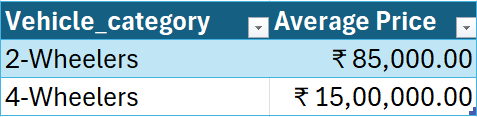

In [49]:
state

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229
...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447
